# ✨***Лабораторная работа №1***✨

**по дисциплине Математическая статистика**

**вариант** ***13***
***
 ***Нечаева Анна, R3338***
***

# ✨***Задание 1***
***



*   указать максимальный и минимальный элементы выборки, найти
размах выборки
***
Отсортируем выборку по возрастастанию и выведем первый, последний элемент и модуль их разности, это и будет минимальный, максимальный элементы и размах выборки соответственно.





In [27]:
import numpy as np
import statistics
from math import factorial, floor, ceil
from matplotlib import pyplot as plt

# открытие файла с выборкой А для чтения
with open('/content/drive/MyDrive/MS_lab_1/ms_lab1_A.txt', 'r') as f_a:
  # запись всех целочисленных элементов в массив
  ar = [int(i) for i in f_a.read().split()]
  # сортировка массива по возрастанию
  sort_ar = sorted(ar)
  # вывод минимального элемента выборки
  print('\u001b[36;1m Минимальный элемент выборки: \u001b[34;1m', sort_ar[0], '\u001b[0m \n')
  # вывод максимального элемента выборки
  print('\u001b[36;1m Максимальный элемент выборки: \u001b[34;1m', sort_ar[-1], '\u001b[0m \n')
  # вывод размаха выборки
  print('\u001b[36;1m Размах выборки: \u001b[34;1m', sort_ar[-1] - sort_ar[0], '\u001b[0m \n')



 Минимальный элемент выборки:  0  

 Максимальный элемент выборки:  4  

 Размах выборки:  4  



***
*   построить статистический ряд и начертить полигон ряда
***
Выведем каждый элемент и частоту, с которой он встретился. Затем на основе полученных данных построим полигон ряда.


Значение  | Частота 

       0  |  21  

       1  |  29  

       2  |  13  

       3  |  7  

       4  |  1  



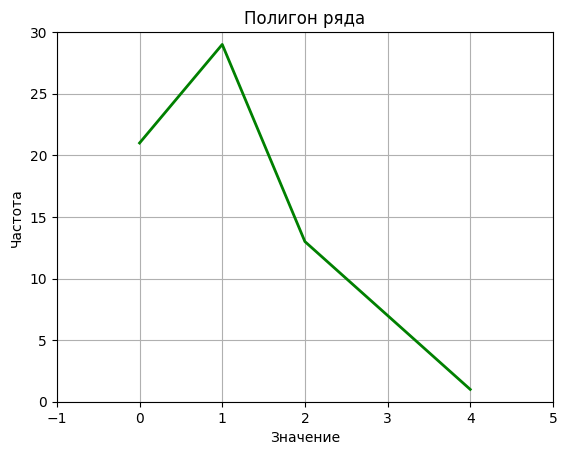

In [94]:
  # подсчитываем частоту каждого значения
  st = sort_ar[0]  # текущее подсчитываемое значение
  cur_sum = 0  # количество элементов текущего значения
  x_a = []  # данные для построение полигона, ось x
  y_a = []  # данные для построение полигона, ось y

  print('\u001b[36;1mЗначение \u001b[34;1m | Частота\u001b[0m \n')

  for i in range(len(sort_ar)):
    if sort_ar[i] == st:
      cur_sum = cur_sum + 1
    else:
      print('\u001b[36;1m      ', st, '\u001b[34;1m | ', cur_sum, '\u001b[0m \n')
      x_a.append(st)
      y_a.append(cur_sum)
      cur_sum = 1
      st = sort_ar[i]

      if i == len(sort_ar) - 1:
        print('\u001b[36;1m      ', st, '\u001b[34;1m | ', cur_sum, '\u001b[0m \n')
        x_a.append(st)
        y_a.append(cur_sum)

  # построение полигона ряда
  plt.axis([-1,5,0,30])
  plt.title('Полигон ряда')
  plt.xlabel('Значение')
  plt.ylabel('Частота')
  plt.plot(x_a, y_a,'g',linewidth=2.0)
  plt.grid(True)
  plt.show()


***
*   записать эмпирическую функцию распределения и построить ее график
***
Построим эмпирическую функцию распределения:
$$F^*(x)=\frac{n_x}{n},$$
где $n_x$ -- количество вариантов строго меньших, чем $x$.

На промежутке $x \in (-\infty, 0]$ $F^*(x)= 0$.

$x \in (0, 1]$ $F^*(x)= \frac{n_1}{n} = \frac{21}{71}$

$x \in (1, 2]$ $F^*(x)= \frac{n_1 + n_2}{n} = \frac{21 + 29}{71}= \frac{50}{71}$

$x \in (2, 3]$ $F^*(x)= \frac{n_1 + n_2 + n_3}{n} = \frac{21 + 29 + 13}{71}= \frac{63}{71}$

$x \in (3, 4]$ $F^*(x)= \frac{n_1 + n_2+ n_3 + n_4}{n} = \frac{21 + 29 + 13 + 7}{71}= \frac{70}{71}$

$x \in (4, +\infty)$ $F^*(x)= \frac{n_1 + n_2+ n_3 + n_4+ n_5}{n} = \frac{21 + 29 + 13 + 7 + 1}{71}= \frac{71}{71} = 1$

В итоге, можно записать:

$$F^*(x)=
\begin{cases}
0, & x \in (-\infty, 0],\\\\
\frac{21}{71}, & x \in (0, 1],\\\\
\frac{50}{71}, & x \in (1, 2],\\\\
\frac{63}{71}, & x \in (2, 3],\\\\
\frac{70}{71}, & x \in (3, 4],\\\\
1, & x \in (4, +\infty)
\end{cases}$$

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in f_a (vectorized)
  outputs = ufunc(*inputs)


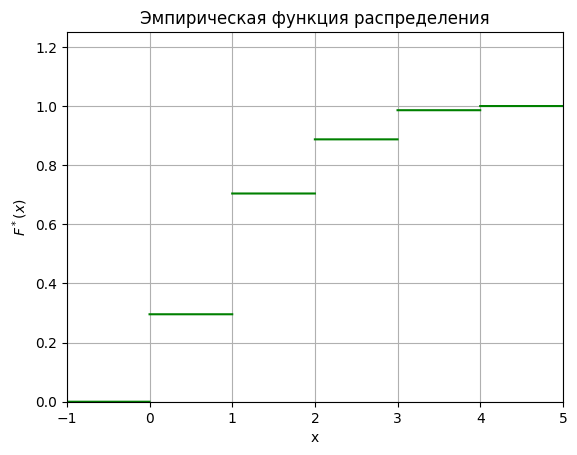

In [95]:
  frec_a = []
  fr_st = 0
  n_a = len(sort_ar)

  # нахождение значений для построения эмпирической функции распределения
  for i in range(len(y_a)):
    fr_st += y_a[i]
    frec_a.append(fr_st)

  # построение графика эмпирической функции распределения
  x_em_a = np.linspace(-7, 7, 1000000)
  delt_a = 0.00001
  x_em_a[(x_em_a > 0 - delt_a) & (x_em_a < 0 + 2 * delt_a) |
         (x_em_a > 1 - delt_a) & (x_em_a < 1 + 2 * delt_a) |
         (x_em_a > 2 - delt_a) & (x_em_a < 2 + 2 * delt_a)|
         (x_em_a > 3 - delt_a) & (x_em_a < 3 + 2 * delt_a)|
         (x_em_a > 4 - delt_a) & (x_em_a < 4 + 2 * delt_a)] = np.nan

  def f_a(x):
    if x <= 0: return 0
    elif 0 < x <= 1: return frec_a[0]
    elif 1 < x <= 2: return frec_a[1]
    elif 2 < x <= 3: return frec_a[2]
    elif 3 < x <= 4: return frec_a[3]
    else: return frec_a[4]

  f_a_v = np.vectorize(f_a)

  plt.axis([-1,5,0,1.25])
  plt.title('Эмпирическая функция распределения')
  plt.xlabel('x')
  plt.ylabel(r'$F^*(x)$')
  plt.plot(x_em_a, f_a_v(x_em_a) / n_a, 'g')
  plt.grid(True)
  plt.show()





***
*   вычислить начальные и центральные эмпирические моменты до 4-го порядка
***
Запишем формулу для вычисления начального эмпирического момента $k$-го порядка:
$$\nu_k = \frac{\sum \limits_1^5 x_i^k \cdot n_i}{n},$$
где $x_i -$значение из статистического ряда, $n_i-$ частота, с которой встречается соответствующее значение, $n -$ количество элементов в выборке.

Формула для вычисления центрального эмпирического момента $k$-го порядка:
$$\mu_k = \frac{\sum \limits_1^5 \left( x_i - \nu_1 \right)^k \cdot n_i}{n},$$
где $x_i -$значение из статистического ряда, $\nu_1 -$ начальный эмпирический момент первого порядка, $n_i-$ частота, с которой встречается соответствующее значение, $n -$ количество элементов в выборке.


In [30]:
  # нахождение начальных эмпирических моментов
  M = [0, 0, 0, 0, 0]
  for t in range(5):
    for i in range(len(x_a)):
      M[t] = M[t] + pow(x_a[i], t) * y_a[i]
    M[t] = M[t] / n_a

  # нахождение центральных эмпирических моментов
  M_c = [0, 0, 0, 0, 0]
  for t in range(5):
    for i in range(len(x_a)):
      M_c[t] = M_c[t] + pow(x_a[i] - M[1], t) * y_a[i]
    M_c[t] = M_c[t] / n_a

  for i in range(len(M)):
    print('\u001b[36;1mНачальный эмпирический момент порядка ', i, ':\u001b[34;1m  ', round(M[i], 3), '\u001b[0m \n')

  print('\u001b[36;1m-----------------------------------------------------------------------\u001b[0m \n')

  for i in range(len(M_c)):
    print('\u001b[36;1mЦентральный эмпирический момент порядка ', i, ':\u001b[34;1m  ', round(M_c[i], 3), '\u001b[0m \n')

  M_c_alternative = [0, 0, 0, 0, 0]
  for t in range(5):
    for i in range(t + 1):
      M_c_alternative[t] = M_c_alternative[t] + (-1) ** i * M[1] ** i * M[t - i] * (factorial(t) / (factorial(i) * factorial(t - i)))

  print(M_c_alternative)

  print('\u001b[33;1mДисперсия должна быть ', statistics.variance(ar), '\u001b[0m \n')

Начальный эмпирический момент порядка  0 :   1.0  

Начальный эмпирический момент порядка  1 :   1.127  

Начальный эмпирический момент порядка  2 :   2.254  

Начальный эмпирический момент порядка  3 :   5.437  

Начальный эмпирический момент порядка  4 :   14.93  

----------------------------------------------------------------------- 

Центральный эмпирический момент порядка  0 :   1.0  

Центральный эмпирический момент порядка  1 :   -0.0  

Центральный эмпирический момент порядка  2 :   0.984  

Центральный эмпирический момент порядка  3 :   0.68  

Центральный эмпирический момент порядка  4 :   2.757  

[1.0, 0.0, 0.9839317595715136, 0.6801299764466582, 2.7572099618281865]
Дисперсия должна быть  0.9979879275653923  



***
*   найти моду, медиану, коэффициенты асимметрии и эксцесса
***
**Мода**:
одно или несколько значений во множестве наблюдений, которое встречается наиболее часто.

**Медиана** : это число, сумма расстояний (или, если более строго, модулей) от которого до всех чисел из набора минимальна. Для выборки нечетного размера соответствует числу в центре отсортированного массива, для четного $-$ среднему арифметическому центральных элментов отсортированной выборки.


**Коэффициент асимметрии** :
$$As = \frac{\mu_{3}}{\sigma^3} = \frac{\mu_{3}}{{\mu_2}^{3/2}},$$
где $\mu_{3}-$центральный эмпирический момент 3-го порядка, $\sigma-$среднее квадратичное отклонение, $\mu_2-$центральный эмпирический момент второго порядка.

*Для выбоки А коэффициент асимметрии положителен (см. результаты вычислений ниже), следовательно, правый хвост графика распределения должен быть длинее левого.*

**Коэффициент эксцесса** :
$$E = \frac{\mu_{4}}{\sigma^4} - 3 = \frac{\mu_{4}}{{\mu_2}^2} - 3,$$
где $\mu_{4}-$центральный эмпирический момент 4-го порядка, $\sigma-$среднее квадратичное отклонение, $\mu_2-$центральный эмпирический момент второго порядка.

*Для выборки А коэффициент эксцесса отрицателен, следовательно, пик около математического ожидания более гладкий, чем у нормального распределения.*

In [63]:
  # нахождение моды
  max_a_freq = 0
  Mode_a = 0
  count_modes = 0

  for i in range(len(y_a)):
    max_a_freq = max(max_a_freq, y_a[i])

  for i in range(len(y_a)):
    if max_a_freq == y_a[i]:
      Mode_a += x_a[i]
      count_modes += 1

  Mode_a /= count_modes

  # нахождение медианы
  Med_a = sort_ar[n_a // 2]
  # нахождение коэффициента асимметрии
  As_a = M_c[3] / (M_c[2] ** (3 / 2))

  # нахождение коэффициента эксцесса
  E_a = M_c[4] / (M_c[2] ** 2) - 3

  print('\u001b[36;1mМода: \u001b[34;1m', Mode_a, '\u001b[0m \n')
  print('\u001b[36;1mМедиана: \u001b[34;1m', Med_a, '\u001b[0m \n')
  print('\u001b[36;1mКоэффициент асимметрии: \u001b[34;1m', round(As_a, 3), '\u001b[0m \n')
  print('\u001b[36;1mКоэффициент эксцесса: \u001b[34;1m', round(E_a, 3), '\u001b[0m \n')
  print('\u001b[33;1mЭксцесс должен быть ', -0.0737, '\u001b[0m \n')



Мода:  1.0  

Медиана:  1  

Коэффициент асимметрии:  0.697  

Коэффициент эксцесса:  -0.152  

Эксцесс должен быть  -0.0737  



***
*   сделать выводы и сформулировать гипотезы о распределении генеральной совокупности, из которой извлечена выборка, оценить параметры этого распределения
***
От

# ✨***Задание 2***
***

*   указать максимальный и минимальный элементы выборки, найти размах выборки
***
Отсортируем выборку по возрастастанию и выведем первый, последний элемент и модуль их разности, это и будет минимальный, максимальный элементы и размах выборки соответственно.

In [32]:
# открытие файла с выборкой B для чтения
with open('/content/drive/MyDrive/MS_lab_1/ms_lab1_B.txt', 'r') as f_b:
  # запись всех целочисленных элементов в массив
  br = [int(i) for i in f_b.read().split()]
  # сортировка массива по возрастанию
  sort_br = sorted(br)
  # вывод минимального элемента выборки
  print('\u001b[36;1m Минимальный элемент выборки: \u001b[34;1m', sort_br[0], '\u001b[0m \n')
  # вывод максимального элемента выборки
  print('\u001b[36;1m Максимальный элемент выборки: \u001b[34;1m', sort_br[-1], '\u001b[0m \n')
  # вывод размаха выборки
  print('\u001b[36;1m Размах выборки: \u001b[34;1m', sort_br[-1] - sort_br[0], '\u001b[0m \n')

 Минимальный элемент выборки:  -91  

 Максимальный элемент выборки:  -21  

 Размах выборки:  70  



***
*   определить оптимальное количество интервалов группировки и длину интервала группировки
***

Для определения оптимального числа интервалов $n$ воспользуемся **правилом Стёрджеса**:
$$n = 1 + \lfloor \log_2 N\rfloor,$$
где $N-$размер выборки.

In [33]:
  # количество элементов в выборке
  N = len(br)
  # определение оптимального числа интервалов
  n = 1 + floor(np.log2(N))
  # длина интервала группировки
  ln_b = ceil((sort_br[-1] - sort_br[0]) / n)

  print('\u001b[36;1mКоличество элементов в выборке: \u001b[34;1m', N, '\u001b[0m \n')
  print('\u001b[36;1mЧисло интервалов: \u001b[34;1m', n, '\u001b[0m \n')
  print('\u001b[36;1mДлина интервала группировки: \u001b[34;1m', ln_b, '\u001b[0m \n')

Количество элементов в выборке:  184  

Число интервалов:  8  

Длина интервала группировки:  9  



***
*   построить интервальный ряд и гистограмму, а также полигон ряда
***

   Интервал   | Центр | Число элементов 

[ -91 , -82 ) | -86.5 |    6  

[ -82 , -73 ) | -77.5 |    15  

[ -73 , -64 ) | -68.5 |    41  

[ -64 , -55 ) | -59.5 |    50  

[ -55 , -46 ) | -50.5 |    37  

[ -46 , -37 ) | -41.5 |    22  

[ -37 , -28 ) | -32.5 |    10  

[ -28 , -19 ) | -23.5 |    3  

Контрольная сумма:  184  



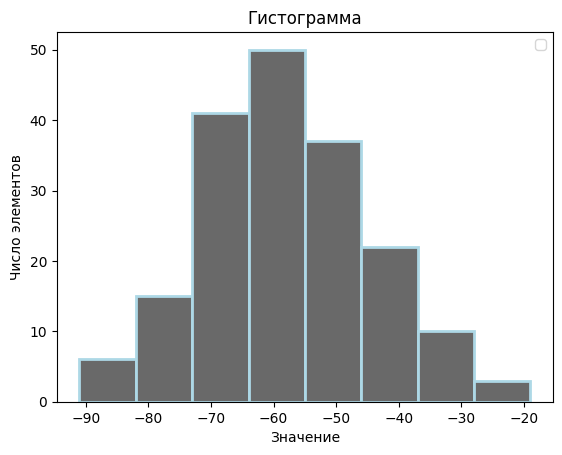

In [96]:
  # создание пустого массива под данные для
  # интервального ряда
  groups_int = [[0] * 4 for i in range(n)]

  # подсчет элементов в каждом из интервалов
  cur_limit = 0
  for i in range(n):
    for j in range(cur_limit, N):
      left_br, groups_int[i][0] = sort_br[0] + i * ln_b, sort_br[0] + i * ln_b
      right_br, groups_int[i][1] = sort_br[0] + (i + 1) * ln_b, sort_br[0] + (i + 1) * ln_b
      cent, groups_int[i][2] = (left_br + right_br) / 2, (left_br + right_br) / 2

      if left_br <= sort_br[j] < right_br:
        groups_int[i][3] += 1
        cur_limit = j + 1
      else:
        break
  # вывод данных интервального ряда
  dat_spec = [0] * 9
  res = 0
  print('\u001b[34;1m   Интервал   \u001b[36;1m| Центр \u001b[32;1m| Число элементов\u001b[0m \n')
  for i in range(n):
    print('\u001b[34;1m[', groups_int[i][0], ',' , groups_int[i][1],
          ') \u001b[36;1m|', groups_int[i][2],'\u001b[32;1m|   ',
          groups_int[i][3], '\u001b[0m \n')
    res += groups_int[i][3]
    dat_spec[i] = groups_int[i][0]
  print('\u001b[32;1mКонтрольная сумма: \u001b[34;1m', res, '\u001b[0m \n')
  dat_spec[8] = groups_int[7][1]


  # построение гистограммы
  groups_int = np.array(groups_int)
  plt.bar( groups_int[:, 2], groups_int[:, 3], width=9, linewidth=2, edgecolor='lightblue', color='dimgray')
  plt.xlabel('Значение')
  plt.ylabel('Число элементов')
  plt.title('Гистограмма')
  plt.legend()
  plt.show()




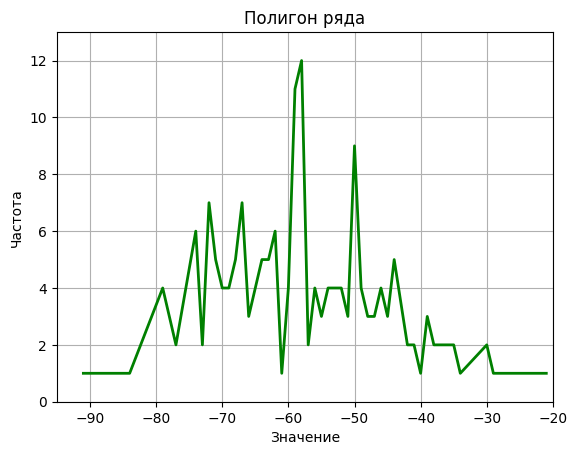

In [97]:
  # построение полигона ряда
  # подсчитываем частоту каждого значения
  st_b = sort_br[0]  # текущее подсчитываемое значение
  cur_sum = 0  # количество элементов текущего значения
  x_b = []  # данные для построение полигона, ось x
  y_b = []  # данные для построение полигона, ось y


  for i in range(len(sort_br)):
    if sort_br[i] == st_b:
      cur_sum = cur_sum + 1
    else:
      x_b.append(st_b)
      y_b.append(cur_sum)
      cur_sum = 1
      st_b = sort_br[i]

      if i == len(sort_br) - 1:
        x_b.append(st_b)
        y_b.append(cur_sum)

  # построение полигона ряда
  plt.axis([-95,-20,0,13])
  plt.title('Полигон ряда')
  plt.xlabel('Значение')
  plt.ylabel('Частота')
  plt.plot(x_b, y_b,'g',linewidth=2.0)
  plt.grid(True)
  plt.show()

***
*   записать эмпирическую функцию распределения и построить ее график, построить кумуляту
***

***
*   вычислить начальные и центральные эмпирические моменты до 4-го порядка
***

***
*   найти моду (отметить на гистограмме), медиану (отметить на кумуляте), коэффициенты асимметрии и эксцесса
***

***
*   сделать выводы и сформулировать гипотезы о распределении генеральной совокупности, из которой извлечена выборка, оценить параметры этого распределения
***